# Table of Contents <a id="top"></a>
- [Reading The Data](#readData)
- [First Takeaway](#firstTake)
- [Second Takeaway](#secondTake)
- [Training The Data](#trainData)
 - [Third Takeaway](#thirdTake)
 - [Class Weights](#weightCtrl)
 - [Oversampling](#trainOver)
 - [Undersampling](#trainUnder)
- [Feature Importance](#dissect)

## Reading The Data <a id="readData"></a>
For starters, lets read the data and its properties

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Grab Data
df = pd.read_excel("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Classification/Data/HRD_Survey_50.xlsx")
df.head()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Staff_Id,Month_Of_Service,Years_Of_Service,Residence,Residence_Code,Net_Salary,Resigned
0,3,4,5,2,2,3,3,3,2,3,4,3,SA63171,1,0,Depok,4,5582218,0
1,2,3,1,2,4,3,4,3,2,2,2,3,SP10211,43,3,Jakarta,1,9213443,0
2,3,3,2,2,2,5,4,4,3,2,4,4,SA79627,10,0,Bekasi,3,5836455,0
3,3,3,4,4,3,1,4,4,4,5,3,4,SA02310,17,1,Depok,4,6035466,0
4,3,2,4,3,3,2,3,4,2,3,2,2,SA98565,17,1,Jakarta,1,5568101,0


In [3]:
# Check data types
df.dtypes

Role Satisfaction               int64
Skill Utilization               int64
Career Growth Opportunity       int64
Supervisor Support              int64
Work-Life Balance               int64
Recognition & Appreciation      int64
Company Culture                 int64
Training & Development          int64
Communication Effectiveness     int64
Diversity & Inclusion           int64
Work Environment                int64
Compensation                    int64
Staff_Id                       object
Month_Of_Service                int64
Years_Of_Service                int64
Residence                      object
Residence_Code                  int64
Net_Salary                      int64
Resigned                        int64
dtype: object

In [4]:
# Making a copy of df, but with only numerical information
# Removing unnecessary columns
pred_df = df.drop(columns=['Staff_Id','Residence'])
pred_df.head()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Month_Of_Service,Years_Of_Service,Residence_Code,Net_Salary,Resigned
0,3,4,5,2,2,3,3,3,2,3,4,3,1,0,4,5582218,0
1,2,3,1,2,4,3,4,3,2,2,2,3,43,3,1,9213443,0
2,3,3,2,2,2,5,4,4,3,2,4,4,10,0,3,5836455,0
3,3,3,4,4,3,1,4,4,4,5,3,4,17,1,4,6035466,0
4,3,2,4,3,3,2,3,4,2,3,2,2,17,1,1,5568101,0


In [5]:
# Describe the new df
pred_df.describe()

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Month_Of_Service,Years_Of_Service,Residence_Code,Net_Salary,Resigned
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,5.000000e+02,500.0000
mean,3.006000,3.038000,3.004000,2.948000,2.950000,3.01600,2.946000,3.016000,3.024000,3.014000,2.990000,3.022000,34.510000,2.30400,3.018000,7.908836e+06,0.1000
std,0.989911,1.046301,1.020817,0.991596,0.980522,1.00487,1.000543,1.042073,1.016608,1.048811,0.977656,1.021569,19.267391,1.43935,1.444246,4.383144e+06,0.3003
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,1.000000,5.070036e+06,0.0000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,18.750000,1.00000,2.000000,5.688296e+06,0.0000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,2.00000,3.000000,6.341903e+06,0.0000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,50.000000,4.00000,4.000000,8.342422e+06,0.0000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,66.000000,4.00000,5.000000,5.443630e+07,1.0000


## First Takeaway <a id="firstTake"></a>
[Back to Top](#top)<br>
- Most features have a minimum value of 1 and a maximum value of 5, except for `Month_of_service` to `Resigned` features.
- The mean value from `Role Satisfaction` to `Compensation` consistently hovers around 3, suggesting normality in the data distribution, which aligns with the observed minimum and maximum values.

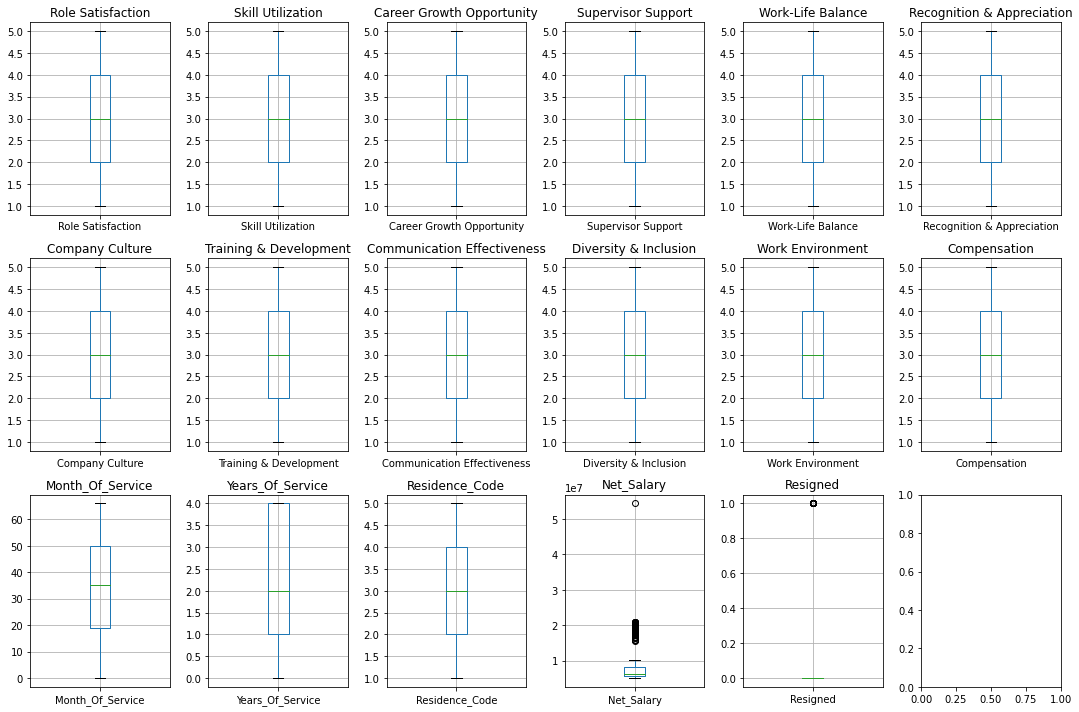

In [6]:
# Making BOXPLOTS to see if there's outlier
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=len(pred_df.columns) // 3 + (len(pred_df.columns) % 3 > 0), figsize=(15, 10))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each column and create a boxplot
for i, col in enumerate(pred_df.columns):
    pred_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
import seaborn as sns
from scipy.stats import norm

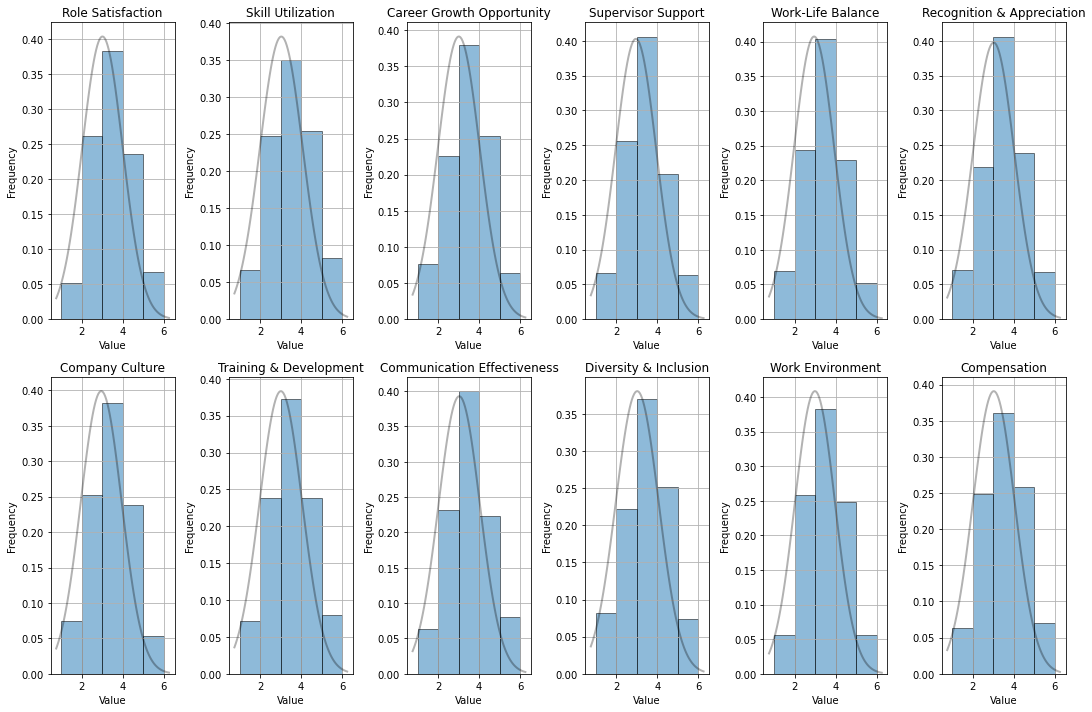

In [8]:
# Making HISTOGRAM and comparing with normal distirbution's bell curve
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15, 10))

# Flatten the axes array to easily iterate over
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(pred_df.columns[:12]):
    # Plot histogram
    pred_df[col].hist(ax=axes[i], bins=[1, 2, 3, 4, 5, 6], alpha=0.5, edgecolor='black', density=True)  # Adjust the number of bins as needed
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

    # Add normal distribution curve
    mu, std = norm.fit(pred_df[col])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

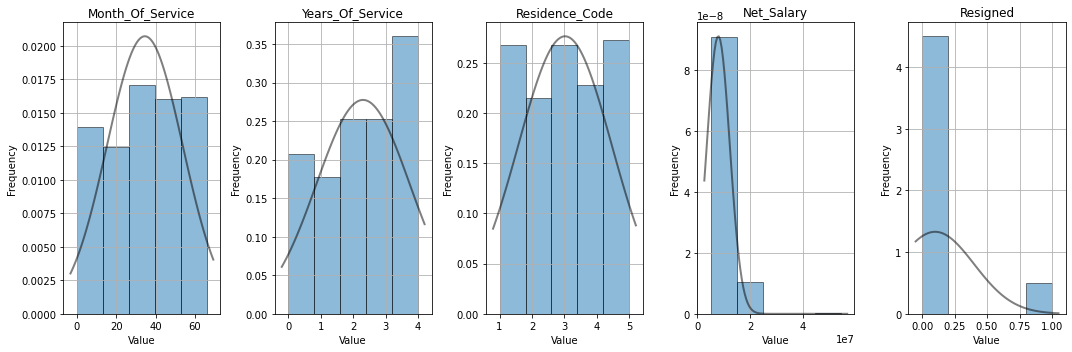

In [9]:
# Making HISTOGRAM and comparing with normal distirbution's bell curve,
# But this time for the remaining columns
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5))

# Loop through each column and create a histogram
for i, col in enumerate(['Month_Of_Service', 'Years_Of_Service', 'Residence_Code', 'Net_Salary', 'Resigned']):
    # Plot histogram
    pred_df[col].hist(ax=axes[i], bins=5, alpha=0.5, edgecolor='black', density=True)  # Adjust the number of bins as needed
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

    # Add normal distribution curve
    mu, std = norm.fit(pred_df[col])
    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2, alpha=0.5)  # Adjust opacity here

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

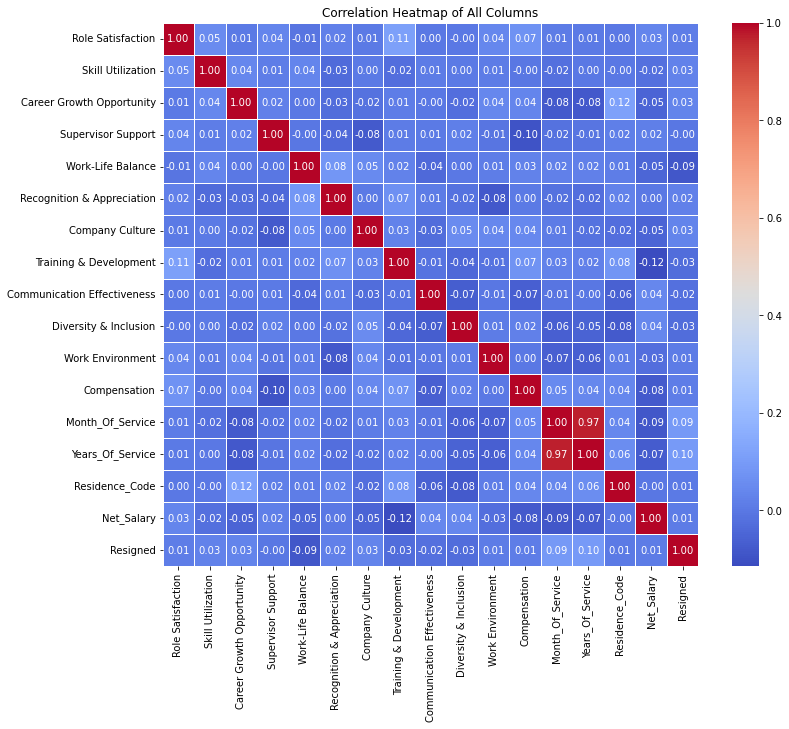

In [10]:
# Calculate the correlation matrix
correlation_matrix = pred_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of All Columns')
plt.show()

## Second takeaway <a id="secondTake"></a>
[Back to Top](#top)<br>
- Identified autocorrelation between the columns `Years_Of_Service` and `Month_Of_Service`. It's necessary to remove one of them. In this scenario, `Years_Of_Service` is chosen for removal.
- After analyzing the histogram of the `Resigned` column, it's evident that the dataset is imbalanced, with a significantly smaller number of instances labeled as 1 compared to 0. This requires a specialized approach to train the data effectively.

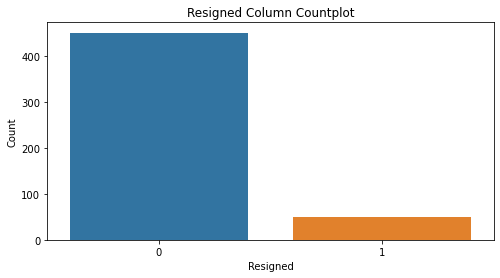

In [11]:
# Confirm the Resigned Column's Labels
plt.figure(figsize=(8, 4))
sns.countplot(x='Resigned', data=pred_df)
plt.title('Resigned Column Countplot')
plt.xlabel('Resigned')
plt.ylabel('Count')
plt.show()

An **"Imbalanced"** Dataset, where in a feature, the disparity between minority and majority class is very evident.

In [12]:
# Drop the column Years_Of_Service
pred_df = pred_df.drop(columns=["Years_Of_Service"])
pred_df.dtypes

Role Satisfaction              int64
Skill Utilization              int64
Career Growth Opportunity      int64
Supervisor Support             int64
Work-Life Balance              int64
Recognition & Appreciation     int64
Company Culture                int64
Training & Development         int64
Communication Effectiveness    int64
Diversity & Inclusion          int64
Work Environment               int64
Compensation                   int64
Month_Of_Service               int64
Residence_Code                 int64
Net_Salary                     int64
Resigned                       int64
dtype: object

## Training the data <a id="trainData"></a>
[Back to Top](#top)<br>
Now, we will attempt to train the dataset. Firstly, with normal settings / no special technique.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Split the data into features (X) and labels (y)
X = pred_df.drop(columns=['Resigned'])
y = pred_df['Resigned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store results
results = {'Model': [], 'F1_score': [], 'Accuracy': [], 'Precision': [], 'Recall': []}

In [16]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Naive Bayes": nb_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# print results
results_df

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Random Forest,Decision Tree,Naive Bayes
Accuracy,0.87,0.820000,0.85
Precision,0.00,0.272727,0.00
Recall,0.00,0.230769,0.00
F1 Score,0.00,0.250000,0.00


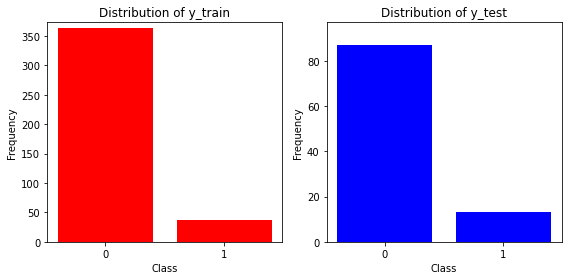

In [17]:
# Calculate class frequencies for y_train and y_test
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Plot y_train and y_test
plt.figure(figsize=(8, 4))

# Plot for y_train
plt.subplot(1, 2, 1)
plt.bar(unique_train, counts_train, color='red')
plt.title('Distribution of y_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train)
plt.ylim(0, max(max(counts_train), max(counts_train)) + 10)

# Plot for y_train
plt.subplot(1, 2, 2)
plt.bar(unique_test, counts_test, color='blue')
plt.title('Distribution of y_test')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_test)
plt.ylim(0, max(max(counts_test), max(counts_test)) + 10)

plt.tight_layout()
plt.show()

## Third Takeaway <a id="thirdTake"></a>
[Back to Top](#top)<br>
- Despite achieving relatively high accuracy, the Random Forest and Naive Bayes models exhibit a precision of 0, suggesting poor performance specifically on the minority class (Resigned = 1).
- To enhance model performance, we will explore additional data transformation techniques. These will include strategies such as adjusting class weights and implementing over/undersampling methods.

## Class Weights <a id="weightCtrl"></a>
[Back to Top](#top)<br>
We will start by adjusting the class weights of the `Resigned` Feature.

In [18]:
from sklearn.utils.class_weight import compute_class_weight

In [19]:
# Firstly, we want to apply stratified splitting method, and containing the value on a new variable.
# X and y are already instantiated in previous code above.

# Run Stratified train-test split
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Then, compute class weights
class_labels = np.unique(y_train_strat)
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train_strat)

# Convert class weights to dictionary format
class_weights_dict = dict(zip(class_labels, class_weights))

# Print class weights
print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5555555555555556, 1: 5.0}


- Class 0 has a weight of approximately **0.5.** This suggests that misclassifications of class 0 will be penalized less heavily during model training compared to class 1. Since this weight is less than 1, it implies that **class 0 is relatively well-represented in the training data.**
- Class 1 has a weight of **5.0.** This indicates that misclassifications of class 1 will be penalized more heavily during model training compared to class 0. Since this weight is greater than 1, it suggests that **class 1 is underrepresented in the training data.**

In [20]:
# Force the new class weights
# Play around with this value
class_weights_new = {0: 1, 1: 1.5}

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_strat, y_train_strat)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_strat, y_train_strat)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_strat, y_train_strat)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Naive Bayes": nb_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_strat)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test_strat, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df = pd.DataFrame(results)

# print results
results_df

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Random Forest,Decision Tree,Naive Bayes
Accuracy,0.9,0.810000,0.9
Precision,0.0,0.153846,0.0
Recall,0.0,0.200000,0.0
F1 Score,0.0,0.173913,0.0


Just like before, the `Random Forest` and `Naive Bayes` model did not pick up the minority class. We will move on to the next technique.

# Oversampling <a id="trainOver"></a>
[Back to Top](#top)<br>
The goal of oversampling is to balance the class distribution by artificially increasing the number of instances in the minority class.

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
# Instantiate oversampler
oversampler = RandomOverSampler(random_state=42)

# Apply Random Oversampling to balance the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

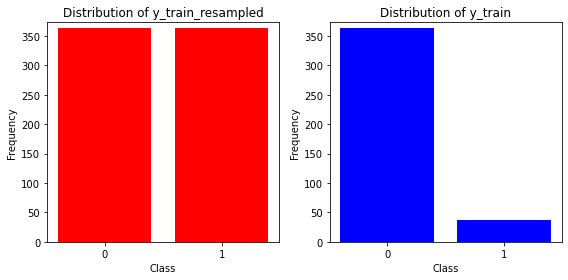

In [23]:
# Calculate class frequencies for y_train_resampled and y_train
unique_train_resampled, counts_train_resampled = np.unique(y_train_resampled, return_counts=True)
unique_train, counts_train = np.unique(y_train, return_counts=True)

# Plot bar plots
plt.figure(figsize=(8, 4))

# Plot for y_train_resampled
plt.subplot(1, 2, 1)
plt.bar(unique_train_resampled, counts_train_resampled, color='red')
plt.title('Distribution of y_train_resampled')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train_resampled)
plt.ylim(0, max(max(counts_train_resampled), max(counts_train)) + 10)

# Plot for y_train
plt.subplot(1, 2, 2)
plt.bar(unique_train, counts_train, color='blue')
plt.title('Distribution of y_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train)
plt.ylim(0, max(max(counts_train_resampled), max(counts_train)) + 10)

plt.tight_layout()
plt.show()

We can see the oversampling algorithm makes synthetic samples to the label 1, to match the frequency of label 0.

In [24]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Naive Bayes": nb_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df_resampled = pd.DataFrame(results)

results_df_resampled

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Random Forest,Decision Tree,Naive Bayes
Accuracy,0.87,0.78,0.780000
Precision,0.00,0.00,0.090909
Recall,0.00,0.00,0.076923
F1 Score,0.00,0.00,0.083333


Using Oversampling, the `Naive Bayes` did pick up the minority class. But, the others are still very poorly performed. We will try the next technique.

## Undersampling <a id="trainUnder"></a>
[Back to Top](#top)<br>
Instead of using the entire dataset, undersampling involves reducing the size of the majority class to balance it with the minority class.

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
# Instantiate undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply Random Undersampling to balance the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

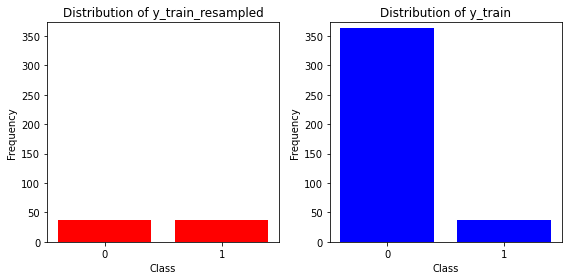

In [27]:
# Calculate class frequencies for y_train_resampled and y_train
unique_train_resampled, counts_train_resampled = np.unique(y_train_resampled, return_counts=True)
unique_train, counts_train = np.unique(y_train, return_counts=True)

# Plot bar plots
plt.figure(figsize=(8, 4))

# Plot for y_train_resampled
plt.subplot(1, 2, 1)
plt.bar(unique_train_resampled, counts_train_resampled, color='red')
plt.title('Distribution of y_train_resampled')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train_resampled)
plt.ylim(0, max(max(counts_train_resampled), max(counts_train)) + 10)

# Plot for y_train
plt.subplot(1, 2, 2)
plt.bar(unique_train, counts_train, color='blue')
plt.title('Distribution of y_train')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(unique_train)
plt.ylim(0, max(max(counts_train_resampled), max(counts_train)) + 10)

plt.tight_layout()
plt.show()

We can see the undersampling algorithm makes "shrinks" the data of label 0, to match the frequency of label 1.

In [28]:
# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Evaluate models
models = {"Random Forest": rf_model, "Decision Tree": dt_model, "Naive Bayes": nb_model}
metrics = {"Accuracy": accuracy_score, "Precision": precision_score, "Recall": recall_score, "F1 Score": f1_score}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    result = {}
    for metric_name, metric_func in metrics.items():
        result[metric_name] = metric_func(y_test, y_pred)
    results[name] = result

# Convert results to DataFrame for easier plotting
results_df_resampled = pd.DataFrame(results)

results_df_resampled

,Random Forest,Decision Tree,Naive Bayes
Accuracy,0.560000,0.490000,0.780000
Precision,0.155556,0.183333,0.090909
Recall,0.538462,0.846154,0.076923
F1 Score,0.241379,0.301370,0.083333


While sacrificing some accuracy, our adjustments have notably improved the recall and F1 Score of the models. This indicates that the model is now capable of effectively capturing instances belonging to both label 1 and label 0, enhancing its overall performance.

## Feature Importance <a id="dissect"></a>
[Back to Top](#top)<br>
From the results of the undersampling method, it produces the best result so far. And we can attempt to dissect the feature importances from each model.

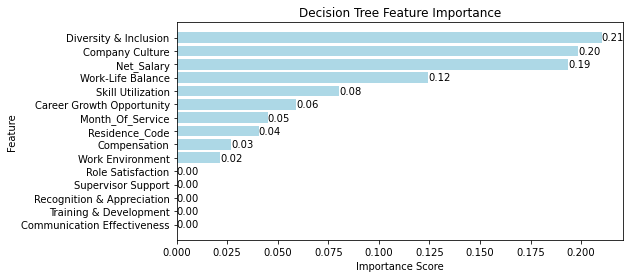

In [29]:
# Get feature importances for Decision Tree model
feature_importances = dt_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance with decimal value labels
plt.figure(figsize=(8, 4))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightblue')

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

# Add decimal value labels to bars
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f'{importance:.2f}', ha='left', va='center')

plt.show()

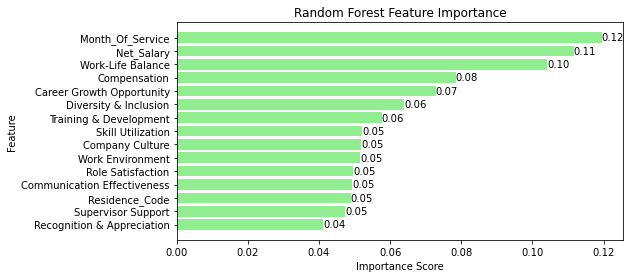

In [30]:
# Get feature importances for Random Forest model
feature_importances_rf = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df_rf = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance scores in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance with decimal value labels
plt.figure(figsize=(8, 4))
bars_rf = plt.barh(feature_importance_df_rf['Feature'], feature_importance_df_rf['Importance'], color='lightgreen')

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important features at the top

# Add decimal value labels to bars
for bar, importance in zip(bars_rf, feature_importance_df_rf['Importance']):
    plt.text(importance, bar.get_y() + bar.get_height()/2, f'{importance:.2f}', ha='left', va='center')

plt.show()


In traditional Naive Bayes models, such as Gaussian Naive Bayes, there isn't a direct concept of "feature importance" as there is in models like Random Forest or Logistic Regression.

Naive Bayes models make predictions based on the probability distribution of features given the class and the prior probability of each class. These models assume that features are conditionally independent given the class, which means that the presence of one feature does not directly influence the presence of another feature.

As a result, Naive Bayes models do not provide feature importance values in the same way as decision tree-based or linear models. Instead, they focus on probability calculations based on the input features and class labels.

## Let's Test it Out!
Let's first make a dummy dataframe with 3 rows.

In [33]:
# Create a dictionary with custom values for each row
data = {
    'Role Satisfaction': [3, 4, 5],
    'Skill Utilization': [2, 3, 4],
    'Career Growth Opportunity': [3, 4, 4],
    'Supervisor Support': [3, 3, 3],
    'Work-Life Balance': [4, 3, 2],
    'Recognition & Appreciation': [2, 4, 4],
    'Company Culture': [3, 4, 5],
    'Training & Development': [3, 3, 4],
    'Communication Effectiveness': [3, 3, 4],
    'Diversity & Inclusion': [5, 5, 5],
    'Work Environment': [4, 3, 4],
    'Compensation': [3, 3, 4],
    'Staff_Id': ['SA63171', 'SA63172', 'SA63173'],
    'Month_Of_Service': [1, 2, 3],
    'Residence_Code': [4, 1, 2],
    'Net_Salary': [5582218, 6200012, 7305551]
}

# Create the DataFrame
test_df = pd.DataFrame(data)

# Display the DataFrame
test_df

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Staff_Id,Month_Of_Service,Residence_Code,Net_Salary
0,3,2,3,3,4,2,3,3,3,5,4,3,SA63171,1,4,5582218
1,4,3,4,3,3,4,4,3,3,5,3,3,SA63172,2,1,6200012
2,5,4,4,3,2,4,5,4,4,5,4,4,SA63173,3,2,7305551


In [35]:
# Create a DataFrame with only the 'Staff_Id' column for later 
staff_id_df = test_df[['Staff_Id']].copy()

# Display the DataFrame
staff_id_df

,Staff_Id
0,SA63171
1,SA63172
2,SA63173


In [37]:
# Drop the Staff_Id
test_df = test_df.drop('Staff_Id', axis=1)
test_df

,Role Satisfaction,Skill Utilization,Career Growth Opportunity,Supervisor Support,Work-Life Balance,Recognition & Appreciation,Company Culture,Training & Development,Communication Effectiveness,Diversity & Inclusion,Work Environment,Compensation,Month_Of_Service,Residence_Code,Net_Salary
0,3,2,3,3,4,2,3,3,3,5,4,3,1,4,5582218
1,4,3,4,3,3,4,4,3,3,5,3,3,2,1,6200012
2,5,4,4,3,2,4,5,4,4,5,4,4,3,2,7305551


Since we trained 3 models, we will use all of them.

In [38]:
# Initialize the models
model_to_test = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model
}

# Iterate over the models
for model_name, model in model_to_test.items():
    # Make predictions
    predictions = model.predict(test_df)
    
    # Create a DataFrame to store predictions
    results_df = pd.DataFrame({
        "Prediction": predictions
    })
    
    # Merge predictions with Staff_Id
    results_with_id_df = pd.concat([staff_id_df, results_df], axis=1)
    
    # Print the title
    print(f"Predictions using {model_name}:")
    
    # Print the resulting DataFrame
    print(results_with_id_df)
    print("\n")


Predictions using Decision Tree:
  Staff_Id  Prediction
0  SA63171           0
1  SA63172           0
2  SA63173           0


Predictions using Random Forest:
  Staff_Id  Prediction
0  SA63171           0
1  SA63172           0
2  SA63173           1


Predictions using Naive Bayes:
  Staff_Id  Prediction
0  SA63171           0
1  SA63172           0
2  SA63173           0


